#**Taller 1 - Procesamiento de Imagenes**

**Autores:**  

* Carlos Bermúdez
* Miguel Thomas


**Programa acádemico:**  

* Ciencias de la computación e Inteligencia Artificial

**Materia:**   
* Procesamiento de Imagenes

#__Requerimientos__
Escribir un programa corto que le permita:

##__Parte 1__
* Abrir una imagen (pueden utilizar una libreria para ello)
* Describir la imagen, al menos indicar el tamaño (número de filas y columnas) y número de canales.
* Convertir a una imagen en escala de grises (monocrómatica) con cuantización a 8 bits y a 4 bits. Cada una de estas imágenes se debe guardar y se debe indicar con un sufijo 8b  o 4b para 8bits y 4bits respectivamente
* Simular cambios en la resolución indicando el tamaño de la loza de un mosaico, así si el tamaño de la imagen es 640 x 480 y el tamaño de la loza es 10 x 10, la imagen resultante sería de 640 x 480 donde cada loza de 10 x 10 tiene el mismo valor, el valor a asignar a la loza puede ser el promedio o la moda, de los píxeles en la imagen original. Se debe guardar con el sufijo  loz.

##__Parte 2__

* Hacer una umbralización, ustedes definen el valor de umbral y se debe guardar el resulatado de la umbralización (la pueden realizar sobre cualquiera de las cuantizaciones) con el sufijo umb
* Realizar un filtro geométrico de escalamiento proporcional, es decir que mantiene la relación de aspecto de la imagen, en un factor indicado por ustedes, dero debe ser mayor a 1. Se debe guardar la imagen en escala de grises escalada con el sufijo esc, se debe además utilizar una interpolación  ya sea (vecino próximo, bilineal o bicúbica) para obtener un mejor escalamiento el resultado se debe guardar con sufijo iesc
* Realizar un filtro geométrico de rotación de la imagen, el valor de rotación lo definen ustedes pero no puede ser un multiplo de 90 grados. Se debe guardar la imagen en escala de grises rotada econ el sufijo rot, se debe además utilizar una interpolación  ya sea (vecino próximo, bilineal o bicúbica) para obtener una mejor rotación el resultado se debe guardar con sufijo irot


El programa y las imágenes resultado se deben entregar en una archivo . zip o .7z nombrado de la siguiente forma [corte] - [inicialNombre apellido] - Taller1  ejemplo
C1-dmartinez-taller1.zip

In [51]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# Descargar imagen
!wget "https://thumbor.forbes.com/thumbor/fit-in/900x510/https://www.forbes.com/home-improvement/wp-content/uploads/2022/07/download-23.jpg" -O house.jpg

--2024-02-25 04:04:07--  https://thumbor.forbes.com/thumbor/fit-in/900x510/https://www.forbes.com/home-improvement/wp-content/uploads/2022/07/download-23.jpg
Resolving thumbor.forbes.com (thumbor.forbes.com)... 151.101.1.55, 151.101.65.55, 151.101.129.55, ...
Connecting to thumbor.forbes.com (thumbor.forbes.com)|151.101.1.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102183 (100K) [image/jpeg]
Saving to: ‘house.jpg’

house.jpg           100%[===================>]  99.79K  --.-KB/s    in 0.004s  

2024-02-25 04:04:07 (22.2 MB/s) - ‘house.jpg’ saved [102183/102183]



(-0.5, 899.5, 505.5, -0.5)

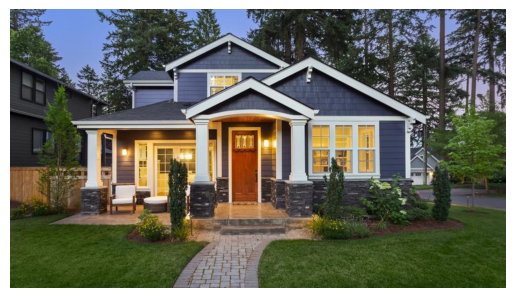

In [53]:
# mostrar imagen
imagen =  plt.imread("house.jpg")
plt.imshow(imagen)
plt.axis('off')

In [54]:
def describir_imagen(imagen):
  """
    Describir una imagen dada mostrando sus propiedades.

    Parámetros:
        imagen (numpy.ndarray): La imagen a describir en formato numpy.ndarray.

    Retorna:
        None: La función imprime las dimensiones  y  canales de la imagen.
    """

  # Describir la imagen
  alto, ancho, canales = imagen.shape
  print("------------------------")
  print("Dimensiones de la imagen")
  print("------------------------")
  print("Alto:", alto)
  print("Ancho:", ancho)
  print("Número de canales:", canales)

describir_imagen(imagen)

------------------------
Dimensiones de la imagen
------------------------
Alto: 506
Ancho: 900
Número de canales: 3


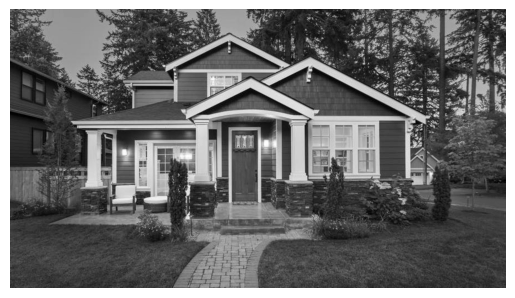

In [55]:
# Convertir a escala de grises utilizando la fórmula de luminosidad (ponderación)
imagen_gris = 0.299 * imagen[:,:,0] + 0.587 * imagen[:,:,1] + 0.114 * imagen[:,:,2]

# Mostrar la imagen en escala de grises
plt.imshow(imagen_gris, cmap='gray')
plt.axis('off')
plt.show()

# PARTE 1

## Cuantizar imagen

In [56]:
def cuantizar_imagen(img, bits):
    '''
    Simula cambios en los numeros de bits guardado en cada pixel
    8 bits: 255 valores posibles
    4 bits: 16 valores posibles

    Parámetros:
        img (numpy.ndarray): La imagen original.
        bits (int): Numero de bits a cuantizar

    Retorna:
        imagen: Imagen cuantizada
    '''
    imagen = img.copy()
    # Calcula el número de niveles de gris posibles
    niveles = 2 ** bits
    # Calcula el factor de cuantización
    factor = 256 / niveles

    print(factor)
    alto = len(imagen)
    ancho = len(imagen[0])
    for i in range(alto):
        for j in range(ancho):
            # Obtiene el valor del píxel actual
            gris = imagen[i][j]

            # Calcula el nuevo valor cuantizado
            cuantizado = int((gris / factor))
            '''Esto deberia funcionar para convertir los 16 valores en una escala de (0 - 250)
            pero no funciona :(
            if bits == 4:
                cuantizado = cuantizado * 16'''
            # Asigna el valor cuantizado al píxel
            imagen[i][j] = cuantizado
    return imagen


imagen_8b = cuantizar_imagen(imagen_gris,8)
cv2.imwrite("imagen_8b.jpg",imagen_8b)


imagen_4b = cuantizar_imagen(imagen_gris,4)
cv2.imwrite("imagen_4b.jpg",imagen_4b)



1.0
16.0


True

In [57]:
img = plt.imread('imagen_4b.jpg')

# No es necesario convertir img a un array de NumPy explícitamente si ya es uno.
# img = np.array(img) # Esta línea es redundante si img ya es un ndarray, pero no debería causar un error.

valores_unicos = np.unique(img)

print(f"Valores únicos en la imagen en escala de grises: {len(valores_unicos)}")
print(valores_unicos)

Valores únicos en la imagen en escala de grises: 18
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


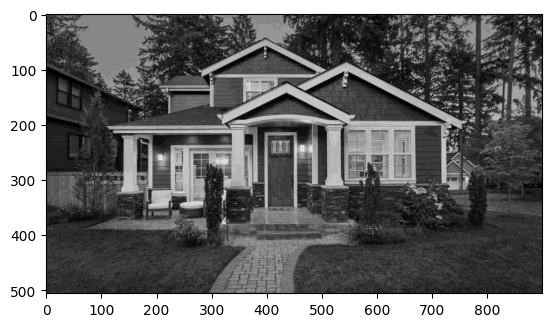

In [58]:
plt.imshow(plt.imread("imagen_4b.jpg"), cmap="gray")

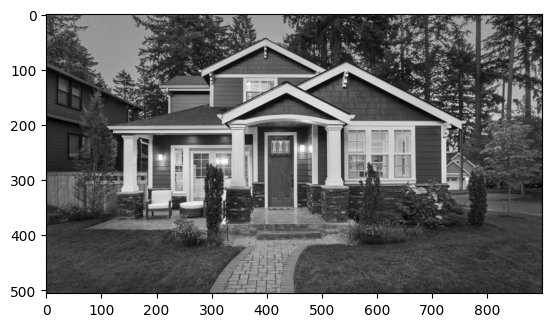

In [59]:
plt.imshow(plt.imread("imagen_8b.jpg"), cmap="gray")

## Cambio Resolucion

In [60]:
def simular_mosaico(imagen, tamano_loza, nombre):
    """
    Simula cambios en la resolución de una imagen utilizando un mosaico.

    Parámetros:
        imagen (numpy.ndarray): La imagen original.
        tamano_loza (tuple): Indica el tamaño de la loza del mosaico (alto, ancho).
        nombre (str): El nombre para la imagen resultante.

    Retorna:
        None: La función guarda la imagen resultante con el sufijo 'loz'.
    """
    # Dimensiones
    alto, ancho = imagen.shape[:2]
    alto_loza, ancho_loza = tamano_loza

    # Lozas
    filas = alto // alto_loza
    columnas = ancho // ancho_loza

    # Crea una imagen vacía para la imagen resultante
    imagen_mosaico = np.copy(imagen)

    for fila in range(filas):
        for columna in range(columnas):
            # Obtiene la región de interés (ROI) de la loza en la imagen original
            roi = imagen[fila*alto_loza : (fila+1)*alto_loza, columna*ancho_loza : (columna+1)*ancho_loza]

            valor_loza = np.mean(roi)

            imagen_mosaico[fila*alto_loza : (fila+1)*alto_loza, columna*ancho_loza : (columna+1)*ancho_loza] = valor_loza

    cv2.imwrite(nombre + "_loz.jpg", imagen_mosaico)

In [61]:
simular_mosaico(imagen,(5,5),"imagen")

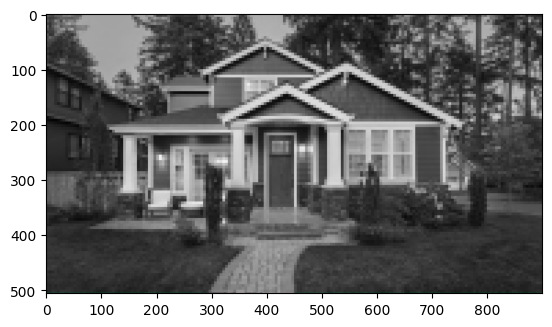

In [62]:
plt.imshow(plt.imread("imagen_loz.jpg"))

# PARTE 2


## Umbralización

In [63]:
def umbrazlizar(img, umbral):
    '''
    Simula cambios en el color del pixel, cambierte la imagen en blanco y negro

    Parámetros:
        img (numpy.ndarray): La imagen original.
        umbral (int): tamaño del umbral

    Retorna:
        img_umbral: imagen umbralizada
    '''
    alto, ancho = img.shape[:2]
    img_umbral = img.copy()

    for i in range(alto):
        for j in range(ancho):

            if img_umbral[i][j] > umbral:
                img_umbral[i][j] = 255
            else:
                img_umbral[i][j] = 0

    return img_umbral
img_umbral = umbrazlizar(imagen_gris,120)
cv2.imwrite("imagen_umb.jpg",img_umbral)

True

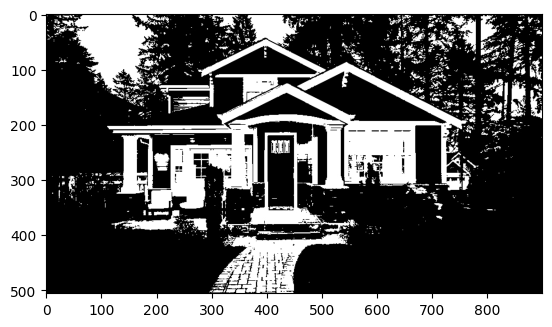

In [64]:
plt.imshow(plt.imread("imagen_umb.jpg"),cmap="gray")

## Filtro geometrico de escalamiento

In [65]:
# Escalamiento proporcional
def escalar_imagen(imagen, factor):
    '''
    Simula cambios en el color del pixel, cambierte la imagen en blanco y negro

    Parámetros:
        img (numpy.ndarray): La imagen original.
        factor (float): factor de escalamiento

    Retorna:
        img_escalada: imagen escalada
    '''
    if factor <= 1:
        raise ValueError("El factor debe ser mayor a 1.")

    alto, ancho = imagen.shape
    nuevo_alto, nuevo_ancho = int(alto * factor), int(ancho * factor)

    imagen_escalada = np.zeros((nuevo_alto, nuevo_ancho), dtype=imagen.dtype)

    for y in range(nuevo_alto):
        for x in range(nuevo_ancho):
            imagen_escalada[y, x] = imagen[int(y / factor), int(x / factor)]

    return imagen_escalada

img_escalada = escalar_imagen(imagen_gris,1.5)

cv2.imwrite("imagen_esc.jpg",img_escalada)

True

In [66]:
#Escalamiento con interpolacion bilineal
def interpolar_bilineal(imagen, x, y):
    x_inferior, y_inferior = int(x), int(y)
    x_superior, y_superior = min(x_inferior + 1, imagen.shape[1] - 1), min(y_inferior + 1, imagen.shape[0] - 1)

    a = x - x_inferior
    b = y - y_inferior

    return (imagen[y_inferior, x_inferior] * (1 - a) * (1 - b) +
            imagen[y_inferior, x_superior] * a * (1 - b) +
            imagen[y_superior, x_inferior] * (1 - a) * b +
            imagen[y_superior, x_superior] * a * b)

def escalar_con_interpolacion(imagen, factor):
    if factor <= 1:
        raise ValueError("El factor debe ser mayor a 1.")

    alto, ancho = imagen.shape
    nuevo_alto, nuevo_ancho = int(alto * factor), int(ancho * factor)

    imagen_interpolada = np.zeros((nuevo_alto, nuevo_ancho), dtype=imagen.dtype)

    for y in range(nuevo_alto):
        for x in range(nuevo_ancho):
            x_original, y_original = x / factor, y / factor
            imagen_interpolada[y, x] = interpolar_bilineal(imagen, x_original, y_original)

    return imagen_interpolada

imagen_con_interpolacion = escalar_con_interpolacion(imagen_gris, 1.5)
cv2.imwrite("imagen_iesc.jpg",imagen_con_interpolacion)

True

Text(0.5, 1.0, 'Escalamiento bilineal')

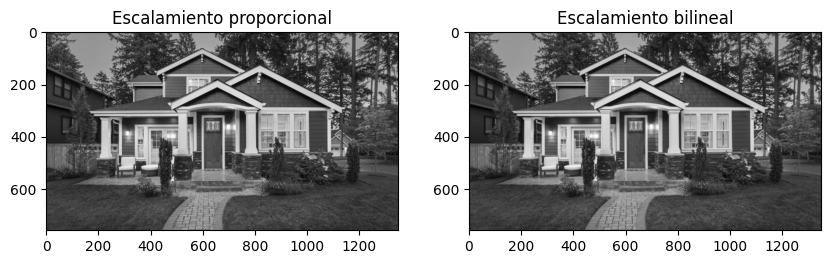

In [67]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(plt.imread("imagen_esc.jpg"),cmap="gray")
plt.title("Escalamiento proporcional")
plt.subplot(1,2,2)
plt.imshow(plt.imread("imagen_iesc.jpg"),cmap="gray")
plt.title("Escalamiento bilineal")


## Filtro geometrico de Rotacion

In [68]:
def rotar_imagen_afin_sin_interpolacion(imagen, angulo):
    """
    Realiza una rotación de la imagen según el ángulo especificado.

    Parámetros:
        imagen (numpy.ndarray): La imagen original en escala de grises.
        angulo (float): El ángulo de rotación en grados.

    Retorna:
        numpy.ndarray: La imagen rotada.
    """
    angulo_rad = np.radians(angulo)

    alto, ancho = imagen.shape

    # Calcular el tamaño necesario para contener
    # toda la información de la imagen original después de la rotación
    diagonal = np.sqrt(alto**2 + ancho**2)
    nuevo_alto = int(np.ceil(diagonal))
    nuevo_ancho = int(np.ceil(diagonal))

    imagen_rotada = np.zeros((nuevo_alto, nuevo_ancho))

    # Calcular el centro de la imagen original y de la imagen rotada
    centro_y_original, centro_x_original = alto // 2, ancho // 2
    centro_y_rotada, centro_x_rotada = nuevo_alto // 2, nuevo_ancho // 2

    for y_rotada in range(nuevo_alto):
        for x_rotada in range(nuevo_ancho):
            x_original = int(np.cos(angulo_rad) * (x_rotada - centro_x_rotada) + np.sin(angulo_rad) * (y_rotada - centro_y_rotada) + centro_x_original)
            y_original = int(-np.sin(angulo_rad) * (x_rotada - centro_x_rotada) + np.cos(angulo_rad) * (y_rotada - centro_y_rotada) + centro_y_original)

            if 0 <= x_original < ancho and 0 <= y_original < alto:
                imagen_rotada[y_rotada, x_rotada] = imagen[y_original, x_original]

    return imagen_rotada


In [69]:
imagen = plt.imread("/content/house.jpg")
imagen_gris = np.mean(imagen, axis=2)

# Angulo en grados
angulo_rotacion = 25

imagen_rotada = rotar_imagen_afin_sin_interpolacion(imagen_gris, angulo_rotacion)

In [70]:
plt.imsave("/content/imagen_rot.jpg", imagen_rotada, cmap='gray')

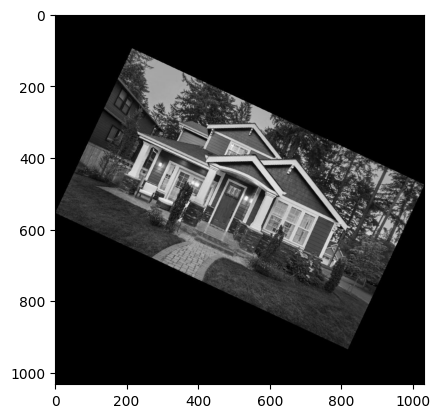

In [71]:
plt.imshow(plt.imread("imagen_rot.jpg"),cmap="gray")

In [72]:
def rotar_imagen_afin(imagen, angulo):
    """
    Realiza una rotación de la imagen según el ángulo especificado.

    Parámetros:
        imagen (numpy.ndarray): La imagen original en escala de grises.
        angulo (float): El ángulo de rotación en grados.

    Retorna:
        numpy.ndarray: La imagen rotada.
    """
    angulo_rad = np.radians(angulo)

    alto, ancho = imagen.shape

    # Calcular el tamaño necesario para contener
    # toda la información de la imagen original después de la rotación
    diagonal = np.sqrt(alto**2 + ancho**2)
    nuevo_alto = int(np.ceil(diagonal))
    nuevo_ancho = int(np.ceil(diagonal))

    imagen_rotada = np.zeros((nuevo_alto, nuevo_ancho))

    # Calcular el centro de la imagen original y de la imagen rotada
    centro_y_original, centro_x_original = alto // 2, ancho // 2
    centro_y_rotada, centro_x_rotada = nuevo_alto // 2, nuevo_ancho // 2

    for y_rotada in range(nuevo_alto):
        for x_rotada in range(nuevo_ancho):

            x_original = np.cos(angulo_rad) * (x_rotada - centro_x_rotada) + np.sin(angulo_rad) * (y_rotada - centro_y_rotada) + centro_x_original
            y_original = -np.sin(angulo_rad) * (x_rotada - centro_x_rotada) + np.cos(angulo_rad) * (y_rotada - centro_y_rotada) + centro_y_original

            if 0 <= x_original < ancho and 0 <= y_original < alto:
                x0, y0 = int(x_original), int(y_original)
                x1, y1 = min(x0 + 1, ancho - 1), min(y0 + 1, alto - 1)

                dx, dy = x_original - x0, y_original - y0

                # Interpolación bilineal
                valor_pixel = (1 - dx) * (1 - dy) * imagen[y0, x0] + dx * (1 - dy) * imagen[y0, x1] + \
                              (1 - dx) * dy * imagen[y1, x0] + dx * dy * imagen[y1, x1]

                imagen_rotada[y_rotada, x_rotada] = valor_pixel

    return imagen_rotada

In [73]:
imagen = plt.imread("/content/house.jpg")
imagen_gris = np.mean(imagen, axis=2)

# Angulo en grados
angulo_rotacion = 25

imagen_rotada = rotar_imagen_afin(imagen_gris, angulo_rotacion)

In [74]:
plt.imsave("/content/imagen_irot.jpg", imagen_rotada, cmap='gray')

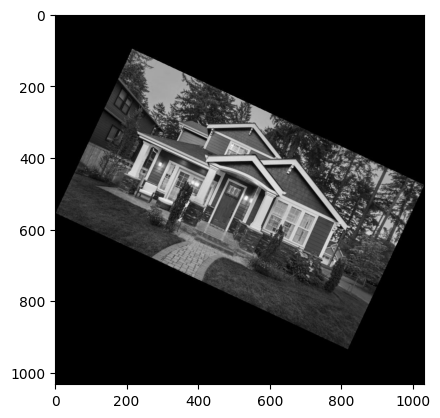

In [75]:
plt.imshow(plt.imread("imagen_irot.jpg"),cmap="gray")